In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as random

from concat_quoter_utc_toFeather import ConcatQuoterUtcToFeather

In [2]:
# Folder for binary df
folder_name = 'temp_df'
file_name = 'df.feather'
file_path = os.path.join(folder_name, file_name)

if not os.path.exists(file_path):
    create_feather_file = ConcatQuoterUtcToFeather(folder_name, file_name)
    create_feather_file.concat_quoter_utc()

In [3]:
feather_df = pd.read_feather(file_path)
print(feather_df.info(),end='\n\n')
print(feather_df.head(5),end='\n\n')
print(feather_df.describe(),end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94694400 entries, 0 to 94694399
Data columns (total 2 columns):
 #   Column  Dtype                           
---  ------  -----                           
 0   Time    datetime64[ns, Europe/Stockholm]
 1   Value   float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 1.4 GB
None

                       Time   Value
0 2020-01-01 00:00:00+01:00  49.866
1 2020-01-01 00:00:01+01:00  49.866
2 2020-01-01 00:00:02+01:00  49.862
3 2020-01-01 00:00:03+01:00  49.863
4 2020-01-01 00:00:04+01:00  49.861
              Value
count  9.469440e+07
mean   4.954495e+01
std    4.796465e+00
min   -1.000000e+00
25%    4.997200e+01
50%    4.999900e+01
75%    5.002600e+01
max    5.050240e+01


In [4]:
feather_df.set_index('Time', inplace=True) #TEMP for this df!!!!

Calculate the time difference in seconds between the dates to check if the amount of seconds is correct from the data

In [5]:
date1 = pd.to_datetime('2020-01-01 00:00:00')
date2 = pd.to_datetime('2022-12-31 23:59:59')

time_difference_seconds = pd.date_range(start=date1, end=date2, freq='S').shape[0]
seconds_from_data = feather_df.count().sum()

if time_difference_seconds == seconds_from_data:
    result = f'The index range matches the data: {seconds_from_data}'
else:
    result = f'The index range dose not match the data: {seconds_from_data}'

print(f'Time difference index range is {time_difference_seconds}\n{result}')

Time difference index range is 94694400
The index range matches the data: 94694400


# Filtering and setup

In [6]:
lower_bound = feather_df.index.min()
upper_bound = feather_df.index.max()

date_from = lower_bound.date()
date_to = upper_bound.date()


print(date_from,'\n',date_to)

2020-01-01 
 2022-12-31


### Fetch a random month

In [7]:
print(feather_df, feather_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94694400 entries, 2020-01-01 00:00:00+01:00 to 2022-12-31 23:59:59+01:00
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Value   float64
dtypes: float64(1)
memory usage: 1.4 GB
                              Value
Time                               
2020-01-01 00:00:00+01:00  49.86600
2020-01-01 00:00:01+01:00  49.86600
2020-01-01 00:00:02+01:00  49.86200
2020-01-01 00:00:03+01:00  49.86300
2020-01-01 00:00:04+01:00  49.86100
...                             ...
2022-12-31 23:59:55+01:00  49.96766
2022-12-31 23:59:56+01:00  49.96575
2022-12-31 23:59:57+01:00  49.96507
2022-12-31 23:59:58+01:00  49.96166
2022-12-31 23:59:59+01:00  49.96383

[94694400 rows x 1 columns] None


In [8]:
# Random Month
random_month = pd.to_datetime(random.uniform(lower_bound, upper_bound), unit='s').round('s')
start_of_month = random_month.replace(day=1, hour=0, minute=0, second=0)
end_of_month = (start_of_month + pd.offsets.MonthEnd()).replace(hour=23, minute=59, second=59)
random_month_data = feather_df[(feather_df.index >= start_of_month) & (feather_df.index <= end_of_month)]

# Random Week
random_week = pd.to_datetime(random.uniform(lower_bound, upper_bound), unit='s').round('s')
start_of_week = random_week - pd.to_timedelta((random_week.dayofweek + 7) % 7, unit='D')
start_of_week = start_of_week.replace(hour=0, minute=0, second=0)
end_of_week = start_of_week + pd.DateOffset(days=6, hours=23, minutes=59, seconds=59)
random_week_data = feather_df[(feather_df.index >= start_of_week) & (feather_df.index <= end_of_week)]

# Random Day
random_day = pd.to_datetime(random.uniform(lower_bound, upper_bound), unit='s').round('s')
start_of_day = random_day.replace(hour=0, minute=0, second=0)
end_of_day = random_day.replace(hour=23, minute=59, second=59)
random_day_data = feather_df[(feather_df.index >= start_of_day) & (feather_df.index <= end_of_day)]

# Print sample data
print(f'\nRandom Month Data:\n{random_month_data.index.min()}\n{random_month_data.index.max()}')
print(f'\nRandom Week Data:\n{random_week_data.index.min()}\n{random_week_data.index.max()}')
print(f'\nRandom Day Data:\n{random_day_data.index.min()}\n{random_day_data.index.max()}')


Random Month Data:
2020-07-01 00:00:00+02:00
2020-07-31 23:59:59+02:00

Random Week Data:
2021-05-24 00:00:00+02:00
2021-05-30 23:59:59+02:00

Random Day Data:
2020-12-06 00:00:00+01:00
2020-12-06 23:59:59+01:00


### Choose a date

In [9]:
from_date = '2020-05-15'
from_time = '10:00:00'
to_date = '2020-06-15'
to_time = '09:00:00'

from_dt = pd.to_datetime(f'{from_date} {from_time}').tz_localize('Europe/Stockholm')
to_dt = pd.to_datetime(f'{to_date} {to_time}').tz_localize('Europe/Stockholm')

choosen_time = feather_df[(feather_df.index >= from_dt) & (feather_df.index <= to_dt)]

print(choosen_time.head(2),end='\n\n')
print(choosen_time.tail(2),end='\n\n')

                            Value
Time                             
2020-05-15 10:00:00+02:00  50.029
2020-05-15 10:00:01+02:00  50.031

                            Value
Time                             
2020-06-15 08:59:59+02:00  49.989
2020-06-15 09:00:00+02:00  49.983


In [10]:
df = feather_df.copy()

disturbance_value_up = 50.1
df['deviation_up'] = df['Value'] > disturbance_value_up
df['deviation_up_count'] = df['deviation_up'].astype(int)
disturbance_up_count_yearly = df['deviation_up_count'].resample('Y').sum()
disturbance_up_count_day = df['deviation_up_count'].resample('D').sum()
disturbance_up_count_week = df['deviation_up_count'].resample('W').sum()
disturbance_up_count_month = df['deviation_up_count'].resample('M').sum()

df['deviation_up_duration'] = df['deviation_up_count'].groupby(df['deviation_up'].ne(df['deviation_up'].shift()).cumsum()).cumsum()
df['deviation_up_duration'] = df['deviation_up_duration'][df['deviation_up_duration'] != 0]

disturbance_up_duration_day = df['deviation_up_duration'].resample('D').mean()
disturbance_up_duration_week = df['deviation_up_duration'].resample('W').mean()
disturbance_up_duration_month = df['deviation_up_duration'].resample('M').mean()

df['hour'] = df.index.hour
disturbance_up_duration_hour = df.groupby('hour')['deviation_up_duration'].mean()

# ----------------------------------------------------------------------------------------------------------

disturbance_value_down = 49.9
df['deviation_down'] = (df['Value'] < disturbance_value_down) & (df['Value'] != -1)
df['deviation_down_count'] = df['deviation_down'].astype(int)
disturbance_down_count_yearly = df['deviation_down_count'].resample('Y').sum()
disturbance_down_count_day = df['deviation_down_count'].resample('D').sum()
disturbance_down_count_week = df['deviation_down_count'].resample('W').sum()
disturbance_down_count_month = df['deviation_down_count'].resample('M').sum()

df['deviation_down_duration'] = df['deviation_down_count'].groupby(df['deviation_down'].ne(df['deviation_down'].shift()).cumsum()).cumsum()
df['deviation_down_duration'] = df['deviation_down_duration'][df['deviation_down_duration'] != 0]

disturbance_down_duration_day = df['deviation_down_duration'].resample('D').mean()
disturbance_down_duration_week = df['deviation_down_duration'].resample('W').mean()
disturbance_down_duration_month = df['deviation_down_duration'].resample('M').mean()

df['hour'] = df.index.hour
disturbance_down_duration_hour = df.groupby('hour')['deviation_down_duration'].mean()

### Disturbance Counts

Yearly

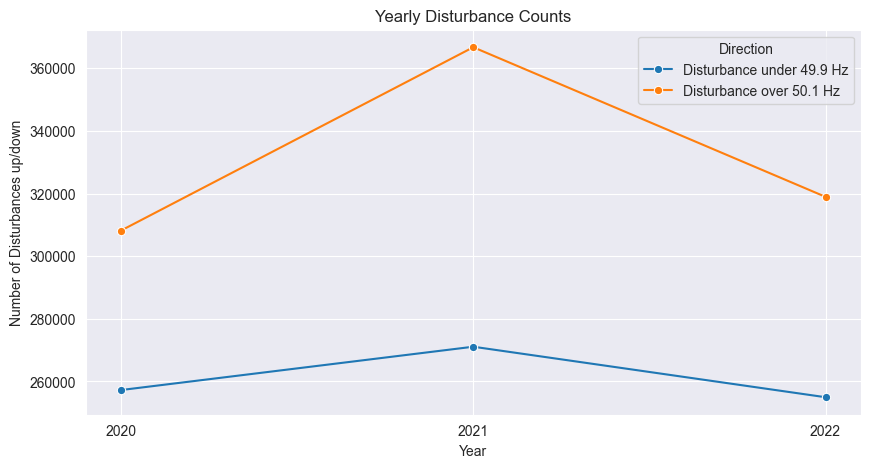

In [11]:
combined_data = pd.DataFrame({
    'Year': disturbance_down_count_yearly.index,
    f'Disturbance under {disturbance_value_down} Hz': disturbance_down_count_yearly.values,
    f'Disturbance over {disturbance_value_up} Hz': disturbance_up_count_yearly.values
})

df_long = pd.melt(combined_data, id_vars='Year', var_name='Direction', value_name='Count')

plt.figure(figsize=(10, 5))

sns.lineplot(x='Year', y='Count', hue='Direction', marker='o', data=df_long)

plt.xlabel('Year')
plt.xticks(disturbance_down_count_yearly.index, disturbance_down_count_yearly.index.year)

plt.ylabel('Number of Disturbances up/down')

plt.title('Yearly Disturbance Counts')

plt.show()

Day, week, month

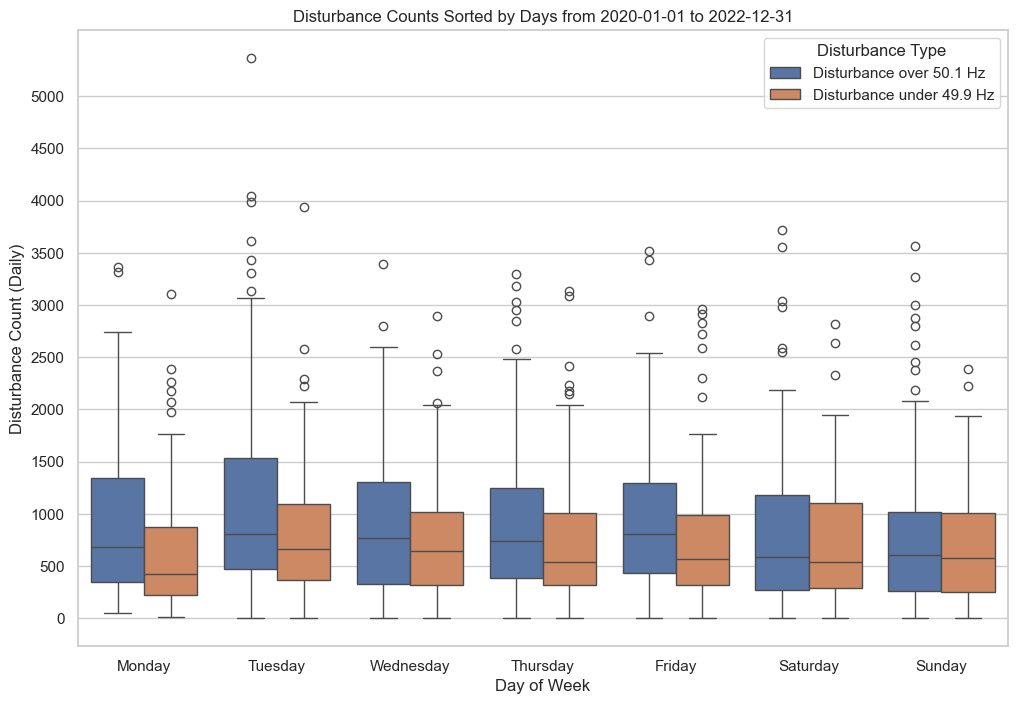

In [12]:
sns.set_theme(style="whitegrid")

combined_data = pd.DataFrame({
    f'Disturbance over {disturbance_value_up} Hz': disturbance_up_count_day.values,
    f'Disturbance under {disturbance_value_down} Hz': disturbance_down_count_day.values
}, index=disturbance_up_count_day.index)

melted_data = combined_data.melt(var_name='Disturbance Type', value_name='Disturbance Count', ignore_index=False)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8))

sns.boxplot(x=melted_data.index.day_name(), y='Disturbance Count', hue='Disturbance Type', data=melted_data, order=days_order)

plt.xlabel('Day of Week')

plt.ylabel('Disturbance Count (Daily)')
plt.yticks(range(0, int(melted_data['Disturbance Count'].max()) + 1, 500))

plt.title(f'Disturbance Counts Sorted by Days from {date_from} to {date_to}')

plt.legend(title='Disturbance Type')

plt.show()

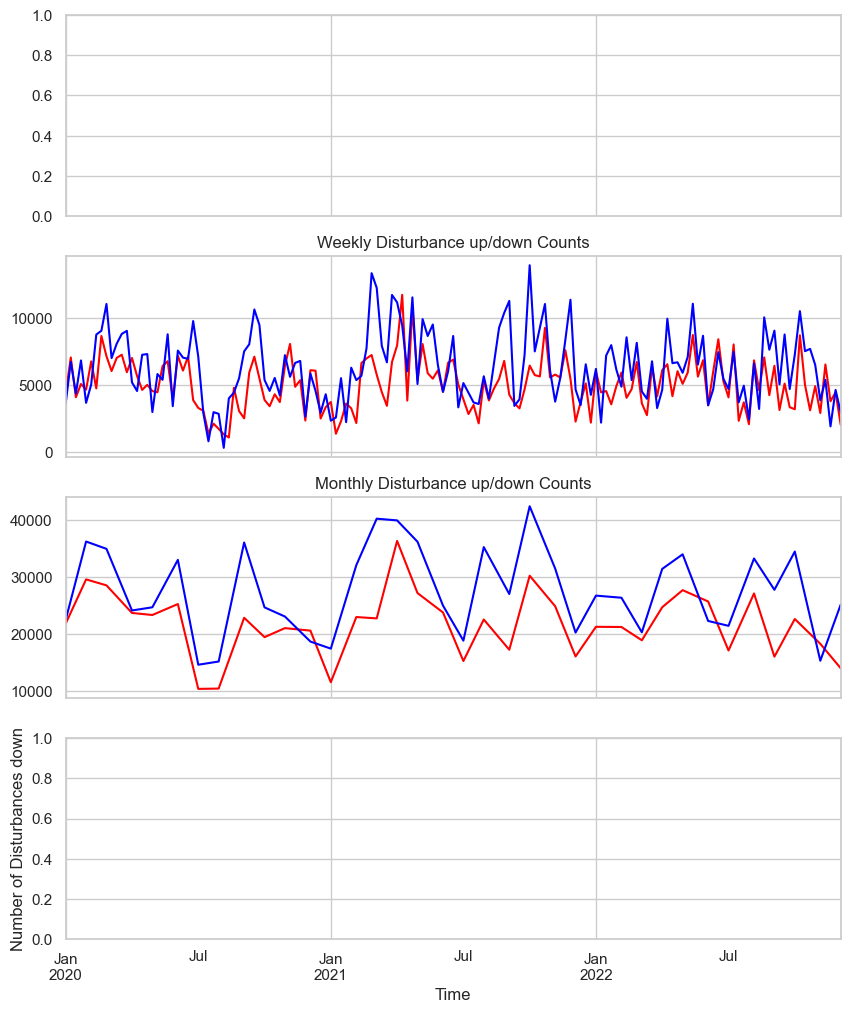

In [13]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 12), sharex=True)

disturbance_down_count_week.plot(ax=axes[1], title='Weekly Disturbance up/down Counts', color='red')
disturbance_up_count_week.plot(ax=axes[1], color='blue')
disturbance_down_count_month.plot(ax=axes[2], title='Monthly Disturbance up/down Counts', color='red')
disturbance_up_count_month.plot(ax=axes[2], color='blue')

plt.xlabel('Time')
plt.ylabel('Number of Disturbances down')
plt.show()

### Disturbance Duration

All time

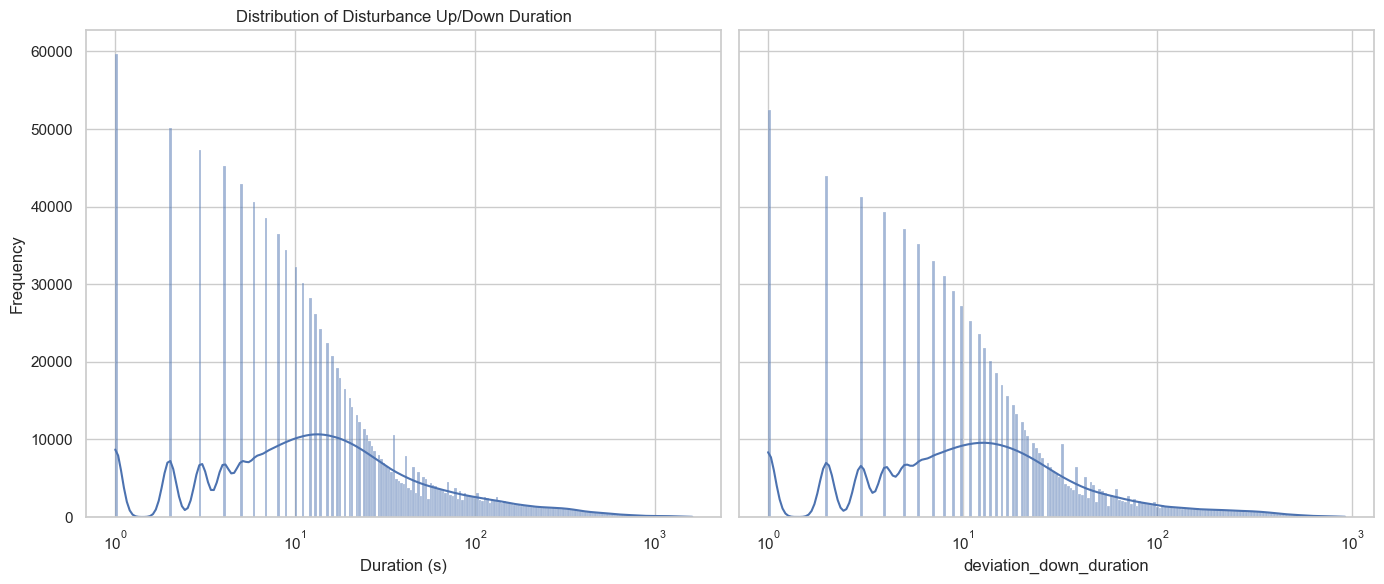

In [25]:
# TODO Get this to work as intended!!

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

sns.histplot(df['deviation_up_duration'],log_scale=True, kde=True, ax=axes[0])
sns.histplot(df['deviation_down_duration'],log_scale=True, kde=True, ax=axes[1])

axes[0].set_title('Distribution of Disturbance Up/Down Duration')
axes[0].set_xlabel('Duration (s)')
axes[0].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

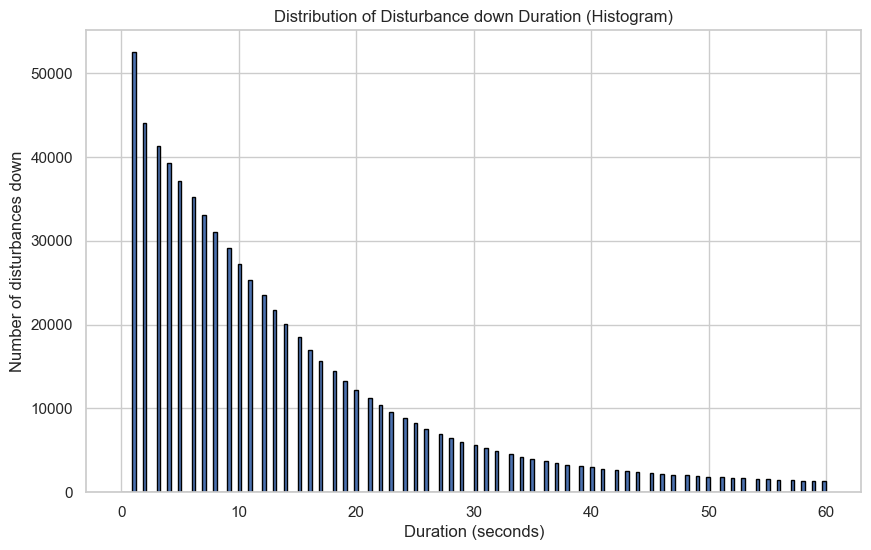

In [18]:
plt.figure(figsize=(10, 6))

df['deviation_down_duration'].plot(kind='hist', bins=200, range=(0, 60), edgecolor='black')

plt.title('Distribution of Disturbance down Duration (Histogram)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of disturbances down')

plt.show()

Day, week, month

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 12), sharex=True)

disturbance_down_duration_day.plot(ax=axes[0], title='Daily Mean Disturbance up/down Duration', color='red')
disturbance_up_duration_day.plot(ax=axes[0], color='blue')
disturbance_down_duration_week.plot(ax=axes[1], title='Weekly Mean Disturbance up/down Duration', color='red')
disturbance_up_duration_week.plot(ax=axes[1], color='blue')
disturbance_down_duration_month.plot(ax=axes[2], title='Monthly Mean Disturbance up/down Duration', color='red')
disturbance_up_duration_month.plot(ax=axes[2], color='blue')

plt.xlabel('Time')
plt.ylabel('Mean Disturbance down Duration (seconds)')
plt.show()

Hour

In [ ]:
disturbance_down_duration_hour.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Mean Disturbance down Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Disturbance down Duration (seconds)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the disturbance metrics using the provided function

# Plotting disturbance counts
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot in the first position
plt.plot(disturbance_up_count_day.index, disturbance_up_count_day, label='Deviation Up', color='blue')
plt.plot(disturbance_down_count_day.index, disturbance_down_count_day, label='Deviation Down', color='red')
plt.title('Disturbance Counts (Daily)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Plotting disturbance durations
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot in the second position
plt.plot(disturbance_up_duration_day.index, disturbance_up_duration_day, label='Deviation Up', color='blue')
plt.plot(disturbance_down_duration_day.index, disturbance_down_duration_day, label='Deviation Down', color='red')
plt.title('Disturbance Durations (Daily)')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns

selected_date = datetime(2022, 1, 1)

df_selected_day = df[(df.index.date == selected_date.date()) ] #& (df['deviation_up_duration'] != 0) & (df['deviation_down_duration'] != 0)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
# plt.scatter(df_selected_day.index, df_selected_day['deviation_up_count'], label='Deviation Up', color='blue', marker='x')
# plt.scatter(df_selected_day.index, df_selected_day['deviation_down_count'], label='Deviation Down', color='red', marker='o')

sns.heatmap(df_selected_day[['deviation_up_count', 'deviation_down_count']], cmap='viridis')

plt.title(f'Disturbance Counts for {selected_date.date()}')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xlabel('x')
plt.ylabel('Time')
plt.legend()

plt.subplot(2, 1, 2) 
plt.scatter(df_selected_day.index, df_selected_day['deviation_up_duration'], label='Deviation Up', color='blue', marker='o')
plt.scatter(df_selected_day.index, df_selected_day['deviation_down_duration'], label='Deviation Down', color='red', marker='o')
plt.title(f'Disturbance Durations for {selected_date.date()}')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xlabel('Time')
plt.ylabel('Duration')
plt.legend()



plt.tight_layout()
plt.show()